**Retail Analysis with Walmart Data**

**DESCRIPTION**

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. 
There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of 
Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate 
machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, 
Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, 
which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation 
than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of 
complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

**Dataset Description**

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales -  sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

**Analysis Tasks**

Basic Statistics tasks

- Which store has maximum sales

- Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

- Which store/s has good quarterly growth rate in Q3’2012

Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

Provide a monthly and semester view of sales in units and give insights

Statistical Model

**For Store 1 – Build  prediction models to forecast demand**

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

*Select the model which gives best accuracy.*

In [1]:
#importing required Libraries
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
#to show plot notebook
%matplotlib inline

In [2]:
#Import Data Set
df = pd.read_csv("~/Desktop/projects/Walmart_Store_sales.csv")

In [3]:
#default displays the First Five rows from the dataset
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


This displays the basics information about our dataset, dimension, No. of nulls 
,datatype of the columns and if the correspond to the data stored.

In [5]:
df.shape

(6435, 8)

This shows that we have 6435 rows and 8 features in our dataset

In [6]:
#Statistical summary of the data
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
# Rows containing duplicate data on train data
duplicate_rows_df = df[df.duplicated()]
print('duplicate rows: ', duplicate_rows_df.shape)

duplicate rows:  (0, 8)


In [11]:
#Finds the Maximum value in each column
df.max()

Store                    45
Date             31-12-2010
Weekly_Sales    3.81869e+06
Holiday_Flag              1
Temperature          100.14
Fuel_Price            4.468
CPI                 227.233
Unemployment         14.313
dtype: object

This shows the number of duplicate rows in our data, and the results shows 0 duplicate rows

In [9]:
# Finding the null values on our train data
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


This shows also that there is no null values in the dataset

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,6.250842e-20,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,6.250842e-20,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


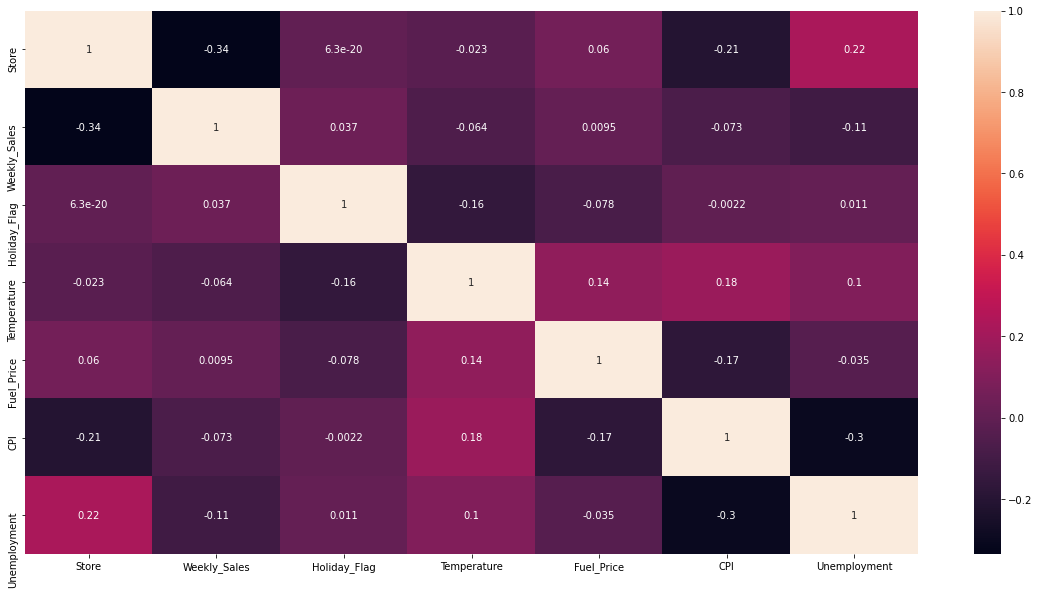

In [10]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
correlation= df.corr()
sns.heatmap(correlation,annot=True)
correlation

The heatmap is the most effective way of showing correlation between our column data, and as it shows above there features shows little to no positive correlation amongs each other.

**1.Which store has maximum sales in this dataset?**

used to find the row meeting the specific condition 

Here we are checking in
- column Weekly_Sales which row or store in particular is having the maximum
- Weekly_Sales.

In [12]:
df.loc[df['Weekly_Sales'] == df['Weekly_Sales'].max()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.54459,8.724


**2.Which store has maximum standard deviation**

i.e., the sales vary a lot.
- Also, find out the coefficient of mean and standard deviation
- Here i am grouping by store and finding the standard deviation and mean of each store.

In [13]:
maxstd=pd.DataFrame(df.groupby('Store').agg({'Weekly_Sales':['std','mean']}))
#Just resetting the index.
maxstd = maxstd.reset_index()
#Now we know that CoV is std/ mean we are doing this for each store.

In [15]:
# Coefficient of mean to standard deviation
coef_mean_std = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std() / df.groupby('Store')['Weekly_Sales'].mean())
coef_mean_std = coef_mean_std.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
coef_mean_std
#finding the store with maximum standard deviation.
maxstd.loc[maxstd[('Weekly_Sales','std')]==maxstd[('Weekly_Sales','std')].max()]

Store   Weekly_Sales              
                    std          mean
13    14  317569.949476  2.020978e+06

**3. Which store/s has good quarterly growth rate in Q3’2012.**

In [16]:
#Converting the data type of date column to dateTime
df['Date'] = pd.to_datetime(df['Date'])
#defining the start and end date of Q3 and Q2
Q3_date_from = pd.Timestamp(date(2012,7,1))
Q3_date_to = pd.Timestamp(date(2012,9,30))
Q2_date_from = pd.Timestamp(date(2012,4,1))
Q2_date_to = pd.Timestamp(date(2012,6,30))
#Collecting the data of Q3 and Q2 from original dataset.
Q2df=df[(df['Date'] > Q2_date_from) & (df['Date'] < Q2_date_to)]
Q3df=df[(df['Date'] > Q3_date_from) & (df['Date'] < Q3_date_to)]
#finding the sum weekly sales of each store in Q2
Q2 = pd.DataFrame(Q2df.groupby('Store')['Weekly_Sales'].sum())
Q2.reset_index(inplace=True)
Q2.rename(columns={'Weekly_Sales': 'Q2_Weekly_Sales'},inplace=True)
#finding the sum weekly sales of each store in Q2
Q3 = pd.DataFrame(Q3df.groupby('Store')['Weekly_Sales'].sum())
Q3.reset_index(inplace=True)
Q3.rename(columns={'Weekly_Sales': 'Q3_Weekly_Sales'},inplace=True)
#mergeing Q2 and Q3 data on Store as a common column
Q3_Growth= Q2.merge(Q3,how='inner',on='Store')

In [18]:
 #Calculating Growth rate of each Store and collecting it into a dataframe
Q3_Growth['Growth_Rate'] =(Q3_Growth['Q3_Weekly_Sales'] -Q3_Growth['Q2_Weekly_Sales'])/Q3_Growth['Q2_Weekly_Sales']
Q3_Growth['Growth_Rate']=round(Q3_Growth['Growth_Rate'],2)
Q3_Growth.sort_values('Growth_Rate',ascending=False).head(1)

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
15,16,6626133.44,6441311.11,-0.03


In [19]:
Q3_Growth.sort_values('Growth_Rate',ascending=False).tail(1)

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
13,14,24427769.06,20140430.4,-0.18


**4.Some holidays have a negative impact on sales.** 
- Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together.

In [20]:
#finding the mean sales of non holiday and holiday
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [21]:
 #marking the holiday dates
Christmas1 = pd.Timestamp(date(2010,12,31) )
Christmas2 = pd.Timestamp(date(2011,12,30) )
Christmas3 = pd.Timestamp(date(2012,12,28) )
Christmas4 = pd.Timestamp(date(2013,12,27) )
Thanksgiving1=pd.Timestamp(date(2010,11,26) )
Thanksgiving2=pd.Timestamp(date(2011,11,25) )
Thanksgiving3=pd.Timestamp(date(2012,11,23) )
Thanksgiving4=pd.Timestamp(date(2013,11,29) )
LabourDay1=pd.Timestamp(date(2010,2,10) )
LabourDay2=pd.Timestamp(date(2011,2,9) )
LabourDay3=pd.Timestamp(date(2012,2,7) )
LabourDay4=pd.Timestamp(date(2013,2,6) )
SuperBowl1=pd.Timestamp(date(2010,9,12) )
SuperBowl2=pd.Timestamp(date(2011,9,11) )
SuperBowl3=pd.Timestamp(date(2012,9,10) )
SuperBowl4=pd.Timestamp(date(2013,9,8) )

#Calculating the mean sales during the holidays
Christmas_mean_sales=df[(df['Date'] == Christmas1) | (df['Date'] == Christmas2)| (df['Date'] == Christmas3) | (df['Date'] == Christmas4)]
Thanksgiving_mean_sales=df[(df['Date'] == Thanksgiving1) | (df['Date'] ==Thanksgiving2) | (df['Date'] == Thanksgiving3) | (df['Date'] ==Thanksgiving4)]
LabourDay_mean_sales=df[(df['Date'] == LabourDay1) | (df['Date'] == LabourDay2)| (df['Date'] == LabourDay3) | (df['Date'] == LabourDay4)]
SuperBowl_mean_sales=df[(df['Date'] == SuperBowl1) | (df['Date'] == SuperBowl2)| (df['Date'] == SuperBowl3) | (df['Date'] == SuperBowl4)]
#
list_of_mean_sales = {'Christmas_mean_sales' :round(Christmas_mean_sales['Weekly_Sales'].mean(),2),
'Thanksgiving_mean_sales': round(Thanksgiving_mean_sales['Weekly_Sales'].mean(),2),
'LabourDay_mean_sales' : round(LabourDay_mean_sales['Weekly_Sales'].mean(),2),
'SuperBowl_mean_sales':round(SuperBowl_mean_sales['Weekly_Sales'].mean(),2),
'Non holiday weekly sales' : df[df['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()}
list_of_mean_sales

{'Christmas_mean_sales': 960833.11,
 'Thanksgiving_mean_sales': 1471273.43,
 'LabourDay_mean_sales': 1008369.41,
 'SuperBowl_mean_sales': nan,
 'Non holiday weekly sales': 1041256.3802088564}

**5.Provide a Monthly,Quaterly and Semester view of sales in units and give insights.**

Text(0, 0.5, 'Weekly_Sales')

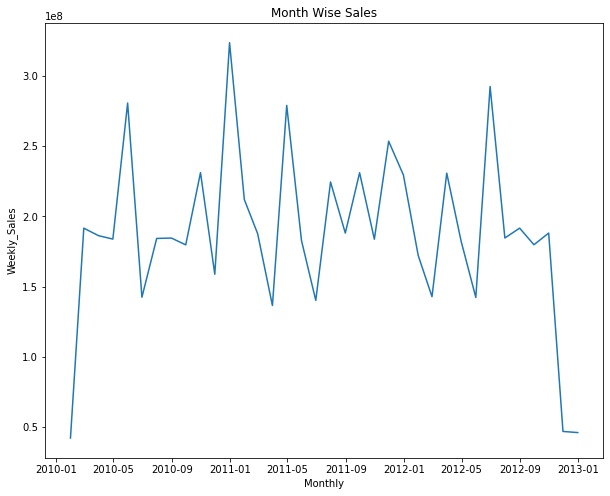

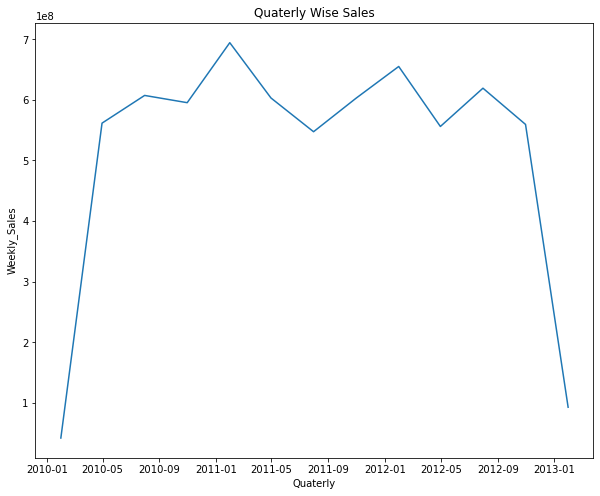

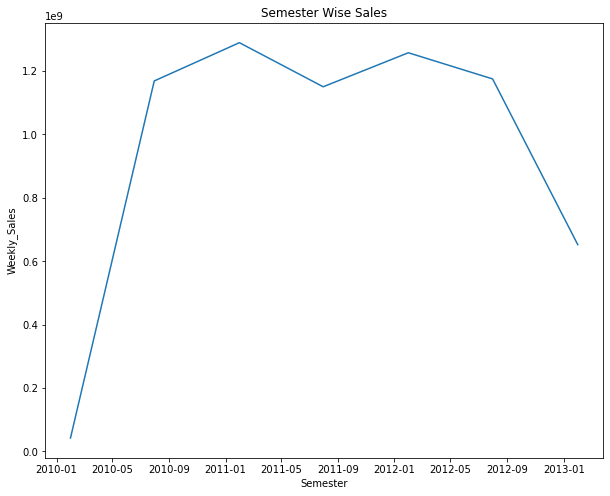

In [23]:
#Monthly sales
monthly = df.groupby(pd.Grouper(key='Date', freq='1M')).sum()# groupby each 1month
monthly=monthly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly_Sales')
#Quaterly Sales
Quaterly = df.groupby(pd.Grouper(key='Date', freq='3M')).sum()
Quaterly = Quaterly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = Quaterly['Date']
Y = Quaterly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Quaterly Wise Sales')
plt.xlabel('Quaterly')
plt.ylabel('Weekly_Sales')
#Semester Sales
Semester = df.groupby(pd.Grouper(key='Date', freq='6M')).sum()
Semester = Semester.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = Semester['Date']
Y = Semester['Weekly_Sales']
plt.plot(X,Y)
plt.title('Semester Wise Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')

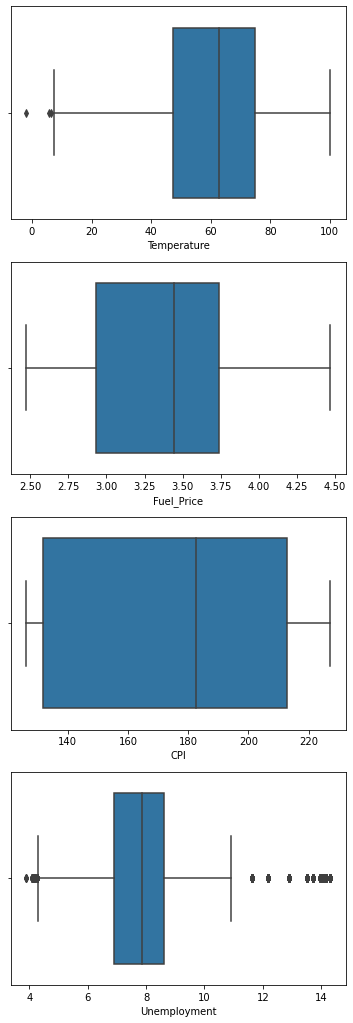

In [25]:
# Build prediction models
# find outliers
fig, axs = plt.subplots(4,figsize=(6,18))
X = df[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(df[column], ax=axs[i])

In [26]:
# drop the outliers
data_new = df[(df['Unemployment']<10) & (df['Unemployment']>4.5) &(df['Temperature']>10)]
data_new

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


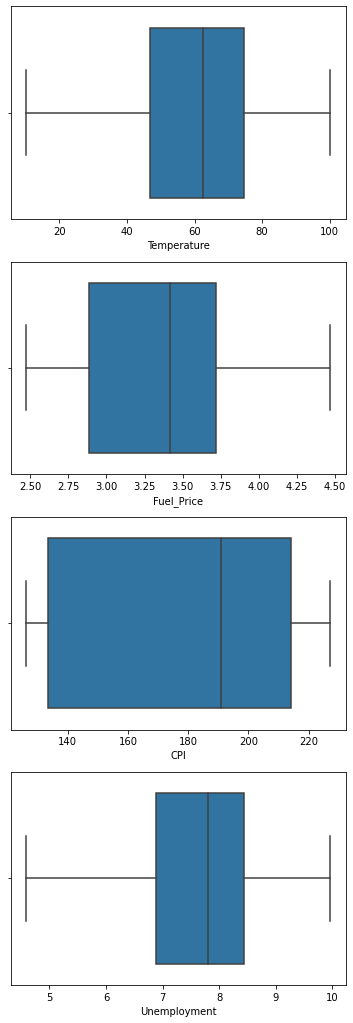

In [27]:
# check outliers
fig, axs = plt.subplots(4,figsize=(6,18))
X = data_new[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(data_new[column], ax=axs[i])

In [32]:
# Build the model
# import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [29]:
 # Select features and target
X = data_new[['Store','Fuel_Price','CPI','Unemployment']]
y = data_new['Weekly_Sales']
# Split data to train and test (0.80:0.20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Linear Regression:

Accuracy: 13.22649545289739
Mean Absolute Error: 459342.113549826
Mean Squared Error: 304963404603.79663
Root Mean Squared Error: 552234.9179505011


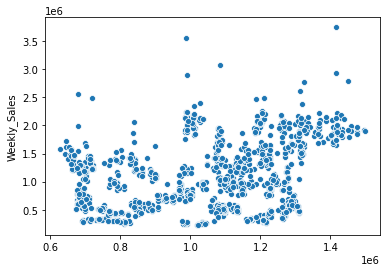

In [30]:
 # Linear Regression model
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
sns.scatterplot(y_pred, y_test);

Random Forest Regressor:

Accuracy: 93.75949963381778
Mean Absolute Error: 76933.21846538184
Mean Squared Error: 20786754364.439404
Root Mean Squared Error: 144176.1227264744


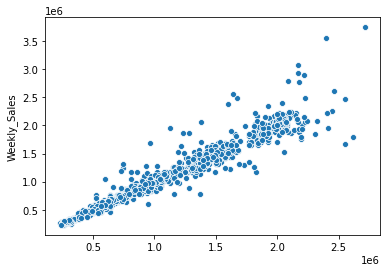

In [31]:
# Random Forest Regressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
sns.scatterplot(y_pred, y_test);

Decision trees:

Accuracy: 100.0
Mean Absolute Error: 98491.76762367491
Mean Squared Error: 40027043490.31184
Root Mean Squared Error: 200067.5973022914


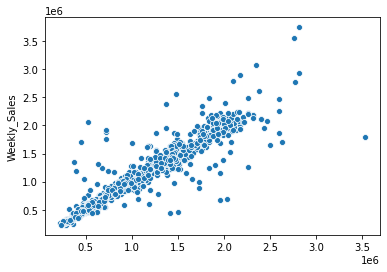

In [33]:
 # Decision trees model
print('Decision trees:')
print()
dt = DecisionTreeRegressor(random_state=42, max_features='log2')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Accuracy:',dt.score(X_train, y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
sns.scatterplot(y_pred, y_test);

- The decision tree fit the model with accuracy of 100, which may be a result of an overfit the dataset. 
- The Random forest fit the data with an accuracy of 93, this might be a very good model given that it is a model to solve the overfitting of Decission trees